## Studi Kasus: analisis data GoFood dengan metode data preprocessing dan statistik deskriptif



In [7]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## IMPORT DATA

* Data 1: Dataset Konsumsi Pangan Masyarakat Perkotaan
* Data 2: Dataset GoFood

In [8]:
# Data Konsumsi
data_konsumsi = pd.read_excel(r"C:\Users\wfimb\Downloads\Case Study Chapter 3 Topic 1_ Dataset Cultural Dimension of Food Consumption.xlsx")
display(data_konsumsi.head(3))

# Data Gofood
data_gofood = pd.read_csv(r"C:\Users\wfimb\Downloads\Case Study Chapter 3 Topic 1_ Dataset Gofood.csv")
display(data_gofood.head(3))

,(A1) CITY,(A2) PROVINCE,(B3) GENDER,(B4) AGE,(B5) RELIGION,(B6) ETHNIC,(B7) EDUCATION LEVEL,(B8) LIVED IN URBAN AREA (YEARS),(B9) OCCUPATION,(B10) SOCIAL CLAS,...,(E19) RELIGIOUS VALUE IN EATING PLACES,(E20) RELIGIOUS VALUE IN CONSUMPTION PATTERN,(E21) CUSTOM VALUE IN TYPE OF FOOD,(E22) CUSTOM VALUE IN EATING PLACES,(E23) CUSTOM VALUE IN CONSUMPTION PATTERN,(24) PRACTICE OF FOOD CONSUMPTION BASED ON RELIGIOUS RULES,(25) PRACTICE OF FOOD CONSUMPTION BASED ON CUSTOM RULES,(E26) BUYING FOOD PRODUCT IN THE RIGHT PLACE BASED ON RELIGIOUS RULES,(E27 TYPE OF DISHES VARIATION BASED ON RELIGIOUS RULES,(E28) PRACTICE OF CONSUMING TRADITIONAL FOOD
0,Jakarta,DKI Jakarta,Female,31,Islam,Java,Senior High School,31,Private Employees,Lower Class,...,Neither agree nor disagree,Agree,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Agree
1,Jakarta,DKI Jakarta,Female,36,Islam,Java,Bachelor degree,32,Private Employees,Lower Class,...,Agree,Agree,Strongly Agree,Agree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree
2,Jakarta,DKI Jakarta,Male,24,Islam,Java,Senior High School,24,Private Employees,Middle Class,...,Agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree


,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,description
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...


## Data Strategy

1. Eksplorasi Data (Data Exploration) satu per satu
    * Check Missing Value
    * Imputation
    * Check Outliers
    * Visualisasi Data
2. Aggregasi Data
    * Membuat Agregasi data di tiap dataset
    * Membuat Agregasi data gabungan

In [9]:
data_gofood.fillna({'discount_price':0,})
# Print Shape
print(f"Data Konsumsi memiliki {data_konsumsi.shape[0]} baris dan {data_konsumsi.shape[1]} kolom")
# Drop Duplicate
data_konsumsi = data_konsumsi.drop_duplicates()
# Print Shape
print(f"Setelah drop duplicate Data Konsumsi memiliki {data_konsumsi.shape[0]} baris dan {data_konsumsi.shape[1]} kolom")

Data Konsumsi memiliki 710 baris dan 28 kolom
Setelah drop duplicate Data Konsumsi memiliki 710 baris dan 28 kolom


In [10]:
# Clean (C12) HOUSEHOLD INCOME (MONTHLY IN MILLION IDR) and (C14) HOUSEHOLD EXPENDITURE (MONTHLY IN MILLION IDR) 
# Income
house_hold_income = (
    data_konsumsi["(C12) HOUSEHOLD INCOME (MONTHLY IN MILLION IDR)"]
        # Ubah ke string
        .astype('str')
        # Split berdasarkan :
        .str.split(":")
)
house_hold_income_rupiah = (    
    # elemen pertama dijadikan Jutaan
    house_hold_income.str[0].astype('int') * 1_000_000 
    +
    # elemen kedua dijadikan Ratusan Ribu
    house_hold_income.str[1].astype('int') * 100_000
)
# Expenditure
house_hold_expenditure = (    
    data_konsumsi["(C14) HOUSEHOLD EXPENDITURE (MONTHLY IN MILLION IDR)"]
            # Ubah ke string
            .astype('str')
            # Split berdasarkan :
            .str.split(":")
)
house_hold_expenditure_rupiah = (
    # elemen pertama dijadikan Jutaan
    house_hold_expenditure.str[0].astype('int') * 1_000_000 
    +
    # elemen kedua dijadikan Ratusan Ribu
    house_hold_expenditure.str[1].astype('int') * 100_000
)
# Apply to Data
data_konsumsi_clean = (
    data_konsumsi.assign(
        HOUSEHOLD_INCOME = house_hold_income_rupiah,
        HOUSEHOLD_EXPENDITURE = house_hold_expenditure_rupiah
    )
    .drop(columns=["(C12) HOUSEHOLD INCOME (MONTHLY IN MILLION IDR)", "(C14) HOUSEHOLD EXPENDITURE (MONTHLY IN MILLION IDR)"])
    .rename(columns={
        "HOUSEHOLD_INCOME":"(C12) HOUSEHOLD INCOME (MONTHLY IN MILLION IDR)",
        "HOUSEHOLD_EXPENDITURE":"(C14) HOUSEHOLD EXPENDITURE (MONTHLY IN MILLION IDR)"
    })
)

data_konsumsi_clean.head(2)



,(A1) CITY,(A2) PROVINCE,(B3) GENDER,(B4) AGE,(B5) RELIGION,(B6) ETHNIC,(B7) EDUCATION LEVEL,(B8) LIVED IN URBAN AREA (YEARS),(B9) OCCUPATION,(B10) SOCIAL CLAS,...,(E21) CUSTOM VALUE IN TYPE OF FOOD,(E22) CUSTOM VALUE IN EATING PLACES,(E23) CUSTOM VALUE IN CONSUMPTION PATTERN,(24) PRACTICE OF FOOD CONSUMPTION BASED ON RELIGIOUS RULES,(25) PRACTICE OF FOOD CONSUMPTION BASED ON CUSTOM RULES,(E26) BUYING FOOD PRODUCT IN THE RIGHT PLACE BASED ON RELIGIOUS RULES,(E27 TYPE OF DISHES VARIATION BASED ON RELIGIOUS RULES,(E28) PRACTICE OF CONSUMING TRADITIONAL FOOD,(C12) HOUSEHOLD INCOME (MONTHLY IN MILLION IDR),(C14) HOUSEHOLD EXPENDITURE (MONTHLY IN MILLION IDR)
0,Jakarta,DKI Jakarta,Female,31,Islam,Java,Senior High School,31,Private Employees,Lower Class,...,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Agree,3800000,3200000
1,Jakarta,DKI Jakarta,Female,36,Islam,Java,Bachelor degree,32,Private Employees,Lower Class,...,Strongly Agree,Agree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree,4200000,4100000


In [11]:
# Check Descriptive Statistic
print("Check Descriptive Statistic")
print(data_konsumsi_clean.describe())

Check Descriptive Statistic
         (B4) AGE  (B8) LIVED IN URBAN AREA (YEARS)  (B11) HOUSEHOLD MEMBER  \
count  710.000000                        710.000000              710.000000   
mean    41.308451                         28.645070                6.022535   
std     11.948966                          8.967781                0.673537   
min     22.000000                          6.000000                5.000000   
25%     31.000000                         23.000000                6.000000   
50%     39.000000                         29.000000                6.000000   
75%     52.000000                         34.000000                6.000000   
max     65.000000                         63.000000                8.000000   

       (C15) % MONTHLY EXPENDITURE FOR FOOD  \
count                            710.000000   
mean                              42.992958   
std                               17.057811   
min                               18.000000   
25%                      

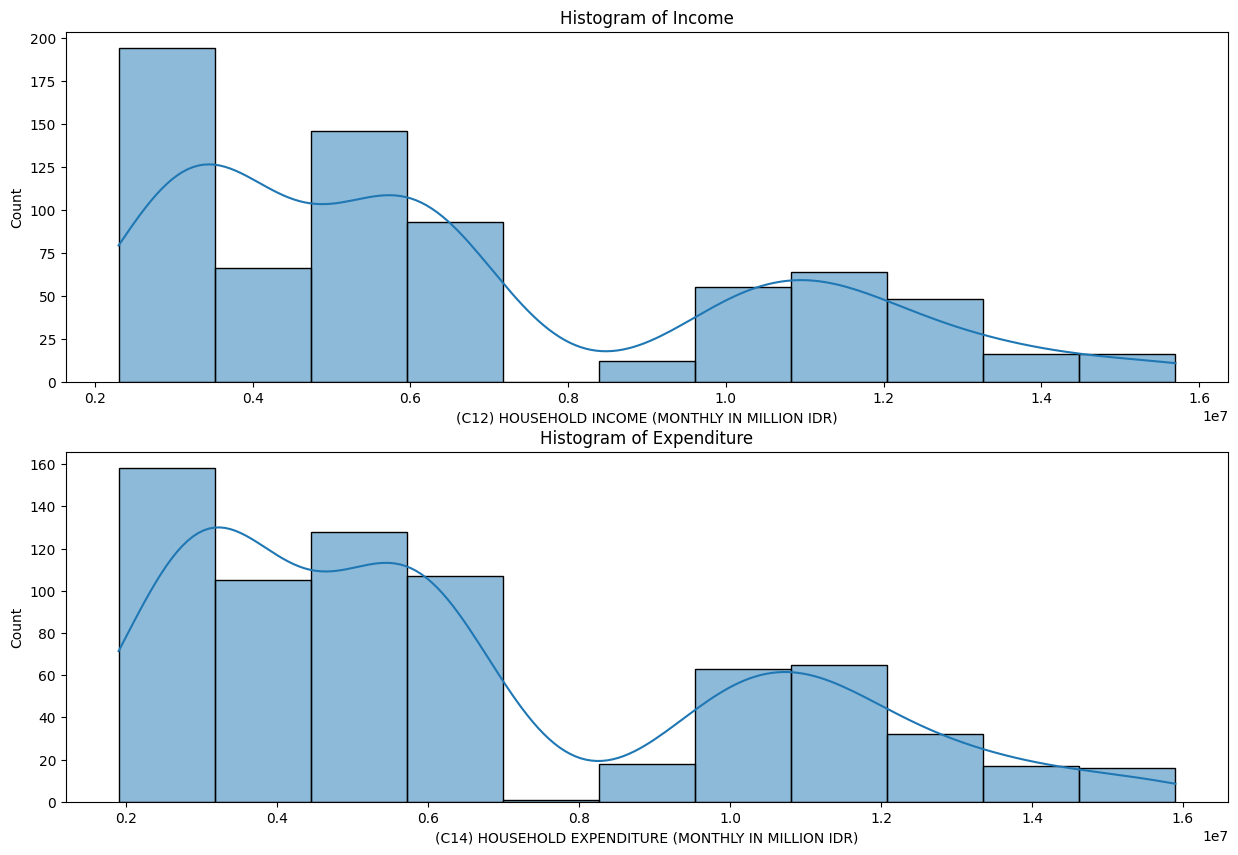

In [12]:
# Plot Histogram of Income, Expenditure, and Selisih Income and Expenditure
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15, 10))
sns.histplot(data_konsumsi_clean["(C12) HOUSEHOLD INCOME (MONTHLY IN MILLION IDR)"], kde=True, ax=ax[0])
ax[0].set_title("Histogram of Income")
sns.histplot(data_konsumsi_clean["(C14) HOUSEHOLD EXPENDITURE (MONTHLY IN MILLION IDR)"], kde=True, ax=ax[1])
ax[1].set_title("Histogram of Expenditure")
plt.show()

In [13]:
# Tingkat pendidikan vs Income
(
    data_konsumsi_clean[["(B7) EDUCATION LEVEL", "(C12) HOUSEHOLD INCOME (MONTHLY IN MILLION IDR)"]]
    .groupby("(B7) EDUCATION LEVEL")
    .aggregate(["mean", "median", "min", "max"])
    # Format thousand separator
    .style.format("{:,.0f}")
)

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,description
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,NaN,0,Sajian Susu Coklat Milo Plus Espresso Dengan R...


Data Gofood memiliki 45195 baris dan 9 kolom
Setelah drop duplicate Data Gofood memiliki 39648 baris dan 9 kolom
Check Data Type
merchant_name      object
merchant_area      object
category           object
display            object
product            object
price             float64
discount_price    float64
isDiscount          int64
description        object
dtype: object



Check Missing Value
merchant_name         0
merchant_area         0
category              0
display               0
product               0
price                 0
discount_price    37061
isDiscount            0
description       19925
dtype: int64



Check Descriptive Statistic


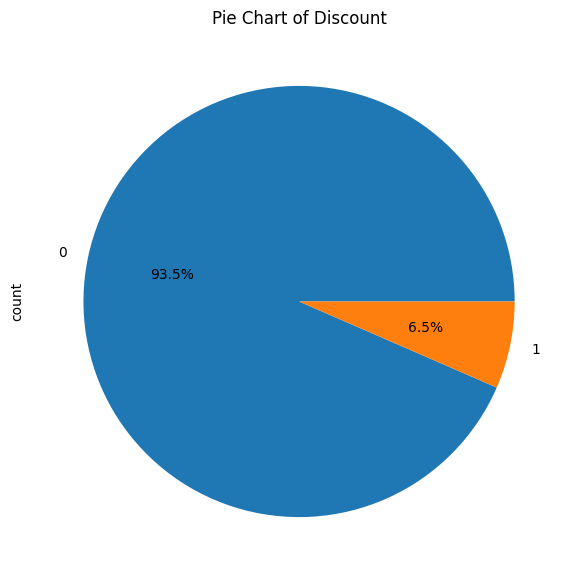

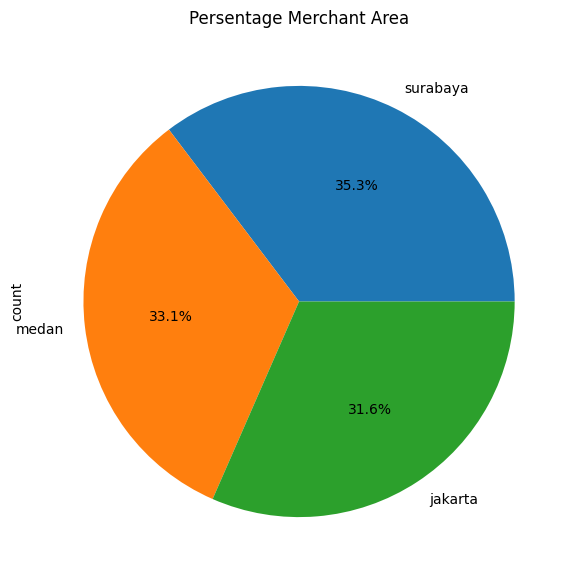

In [14]:
display(data_gofood.head())
# Check Jumlah data
print(f"Data Gofood memiliki {data_gofood.shape[0]} baris dan {data_gofood.shape[1]} kolom")
# Drop Duplicate
data_gofood = data_gofood.drop_duplicates()
# Print Shape
print(f"Setelah drop duplicate Data Gofood memiliki {data_gofood.shape[0]} baris dan {data_gofood.shape[1]} kolom")

# Check Data Type
print("Check Data Type")
print(data_gofood.dtypes)
print("\n\n")
# Check Missing Value
print("Check Missing Value")
print(data_gofood.isna().sum())
# Check Descriptive Statistic
print("\n\n")
print("Check Descriptive Statistic")
data_gofood.describe().style.format("{:,.0f}")

# Filter & Preprocessing
data_gofood_clean = (
    data_gofood
    # Filter buang kategori yang tidak relevan
    .loc[~data_gofood['display'].isin(['Kantong Belanja', 'Party Supply', 'Tas Belanja','Cutleries', 'Promo Pickup', 'Takeaway Bag'])]
    # Hanya ambil yang harga diatas 1000
    .loc[(data_gofood["price"] > 1000)]
    .fillna(
        {
            'discount_price':0,
            'description': lambda x: x['product'] + " ala " + x['merchant_name']
        }
    )
)

# Filter & Preprocessing
data_gofood_clean = (
    data_gofood
    # Filter buang kategori yang tidak relevan
    .loc[~data_gofood['display'].isin(['Kantong Belanja', 'Party Supply', 'Tas Belanja','Cutleries', 'Promo Pickup', 'Takeaway Bag'])]
    # Hanya ambil yang harga diatas 1000
    .loc[(data_gofood["price"] > 1000)]
    .fillna(
        {
            'discount_price':0,
            'description': data_gofood['product'] + " ala " + data_gofood['merchant_name']
        }
    )
)
data_gofood_clean.head(3)

# Pie Chart dari data yang memiliki discount dengan kolom isDiscount
fig, ax = plt.subplots(figsize=(7, 7))
data_gofood_clean["isDiscount"].value_counts().plot.pie(autopct="%.1f%%", ax=ax)
plt.title("Pie Chart of Discount")
plt.show()
# Visualize Persentage Merchant Area
fig, ax = plt.subplots(figsize=(10, 7))
data_gofood_clean["merchant_area"].value_counts().plot.pie(autopct="%.1f%%", ax=ax)
plt.title("Persentage Merchant Area")
plt.show()